In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("customer-data.csv")

In [2]:
df.isna().sum()

id                       0
age                      0
gender                   0
race                     0
driving_experience       0
education                0
income                   0
credit_score           982
vehicle_ownership        0
vehicle_year             0
married                  0
children                 0
postal_code              0
annual_mileage         957
vehicle_type             0
speeding_violations      0
DUIs                     0
past_accidents           0
outcome                  0
dtype: int64

In [3]:
df.groupby(by="income")["credit_score"].mean()

income
middle class     0.523659
poverty          0.348331
upper class      0.613827
working class    0.431929
Name: credit_score, dtype: float64

In [4]:
def impute_creditscore(income_classes):
    for income_class in income_classes:      
        mask = df["income"] == income_class
        mean = df[df["income"] == income_class]["credit_score"].mean()
        df.loc[mask,"credit_score"] = df.loc[mask,'credit_score'].fillna(mean)

In [5]:
income_groups = ["poverty","upper class","middle class","working class"]
impute_creditscore(income_groups)
df.isnull().sum()

id                       0
age                      0
gender                   0
race                     0
driving_experience       0
education                0
income                   0
credit_score             0
vehicle_ownership        0
vehicle_year             0
married                  0
children                 0
postal_code              0
annual_mileage         957
vehicle_type             0
speeding_violations      0
DUIs                     0
past_accidents           0
outcome                  0
dtype: int64

In [6]:
df.groupby(by="driving_experience")["annual_mileage"].mean()

driving_experience
0-9y      12249.131670
10-19y    11791.275168
20-29y    11144.181256
30y+      10694.968553
Name: annual_mileage, dtype: float64

In [7]:
mean_mileage = df["annual_mileage"].mean()
df["annual_mileage"].fillna(mean_mileage,inplace=True)
df.isna().sum()

id                     0
age                    0
gender                 0
race                   0
driving_experience     0
education              0
income                 0
credit_score           0
vehicle_ownership      0
vehicle_year           0
married                0
children               0
postal_code            0
annual_mileage         0
vehicle_type           0
speeding_violations    0
DUIs                   0
past_accidents         0
outcome                0
dtype: int64

In [8]:
df.drop(["id","postal_code"],axis=1,inplace=True)

In [9]:
df["gender"].value_counts()

gender
female    5010
male      4990
Name: count, dtype: int64

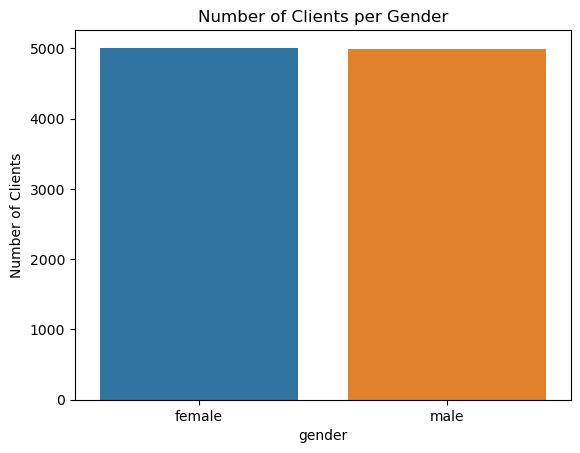

In [10]:
sns.countplot(data=df,x="gender")
plt.title("Number of Clients per Gender")
plt.ylabel("Number of Clients")
plt.show()

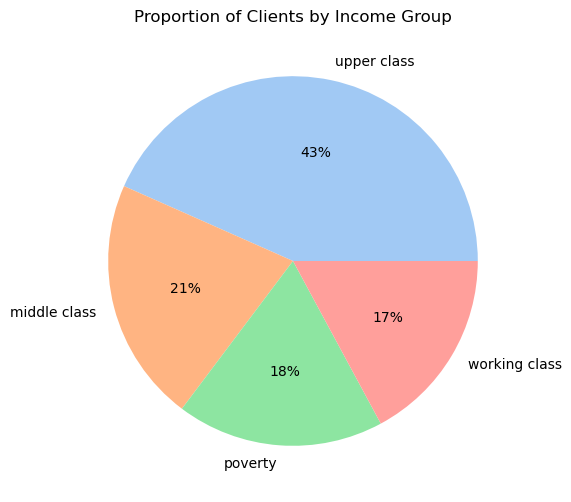

In [11]:
plt.figure(figsize=[6,6])
data = df["income"].value_counts(normalize=True)
labels = ["upper class","middle class","poverty","working class"]
colors = sns.color_palette('pastel')
plt.pie(data,labels=labels,colors=colors, autopct='%.0f%%')
plt.title("Proportion of Clients by Income Group")
plt.show()

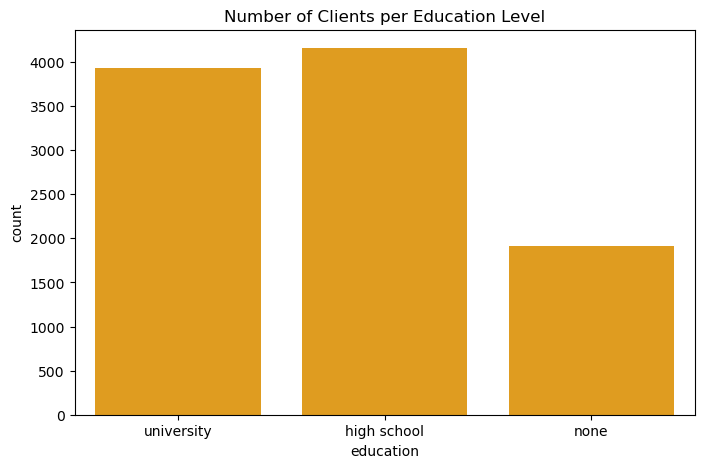

In [12]:
plt.figure(figsize=[8,5])
sns.countplot(data=df,x="education",order=["university","high school","none"],color="orange")
plt.title("Number of Clients per Education Level")
plt.show()

In [13]:
df["credit_score"].describe()

count    10000.000000
mean         0.515247
std          0.134628
min          0.053358
25%          0.421301
50%          0.523659
75%          0.613827
max          0.960819
Name: credit_score, dtype: float64

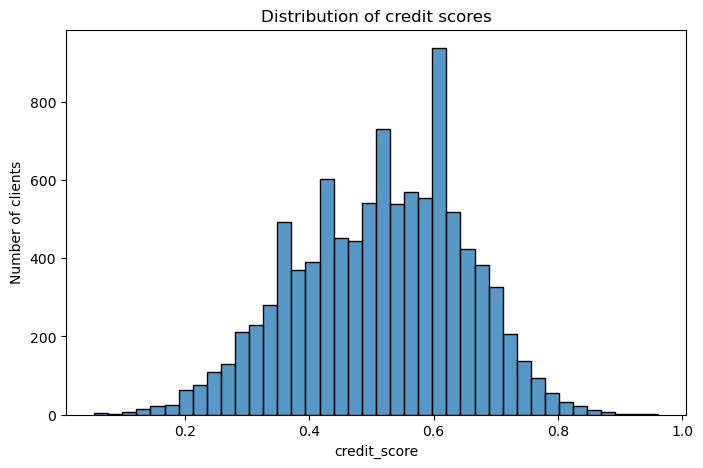

In [14]:
plt.figure(figsize=[8,5])
sns.histplot(data=df,x="credit_score",bins=40).set(title="Distribution of credit scores",ylabel="Number of clients")
plt.show()

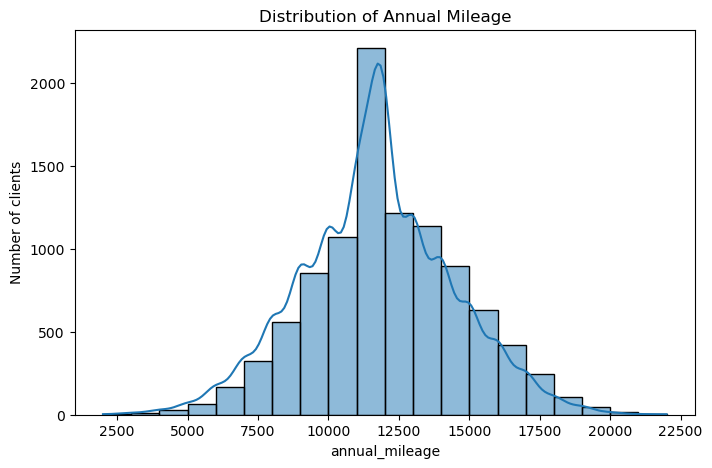

In [15]:
plt.figure(figsize=[8,5])
sns.histplot(data=df,x="annual_mileage",bins=20,kde=True).set(title="Distribution of Annual Mileage",ylabel="Number of clients")
plt.show()

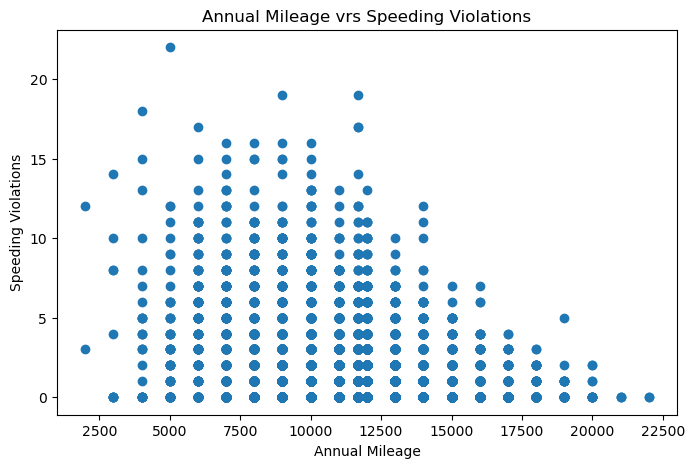

In [16]:
plt.figure(figsize=[8,5])
plt.scatter(data=df,x="annual_mileage",y="speeding_violations")
plt.title("Annual Mileage vrs Speeding Violations")
plt.ylabel("Speeding Violations")
plt.xlabel("Annual Mileage")
plt.show()

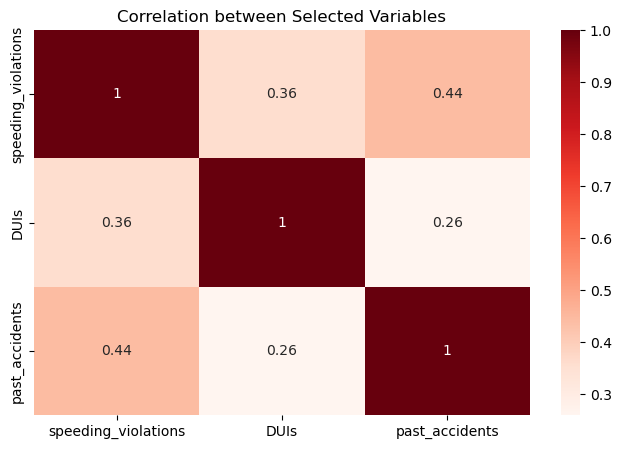

In [18]:
corr_matrix = df[["speeding_violations","DUIs","past_accidents"]].corr()
corr_matrix
plt.figure(figsize=[8,5])
sns.heatmap(corr_matrix,annot=True,cmap='Reds')
plt.title("Correlation between Selected Variables")
plt.show()

In [19]:
df.groupby('outcome')['annual_mileage'].mean()

outcome
False    11375.549735
True     12401.574221
Name: annual_mileage, dtype: float64

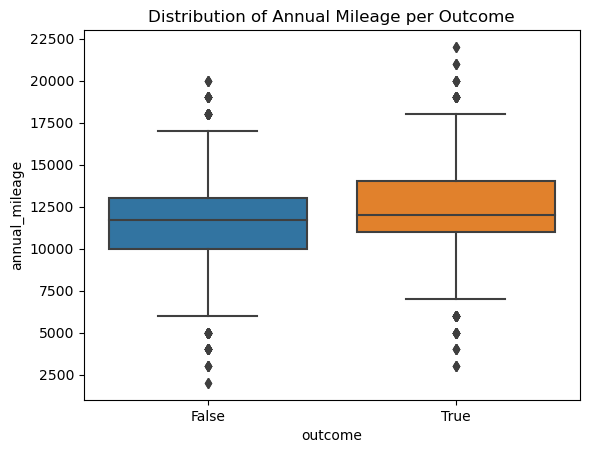

In [20]:
sns.boxplot(data=df,x='outcome', y='annual_mileage')
plt.title("Distribution of Annual Mileage per Outcome")
plt.show()

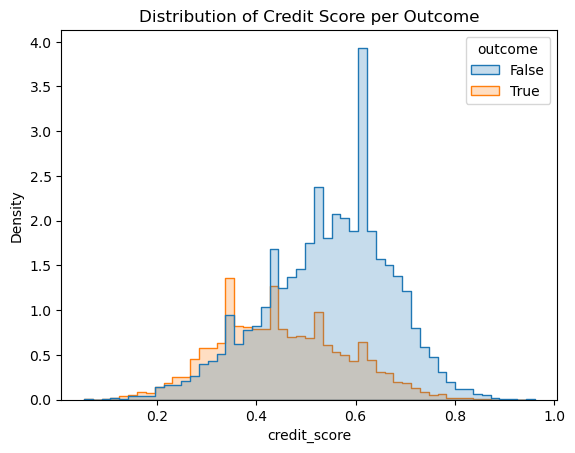

In [21]:
sns.histplot(df,x="credit_score",hue="outcome",element="step",stat="density")
plt.title("Distribution of Credit Score per Outcome")
plt.show()

In [22]:
df['claim_rate'] = np.where(df['outcome']==True,1,0)
df['claim_rate'].value_counts()

claim_rate
0    6867
1    3133
Name: count, dtype: int64

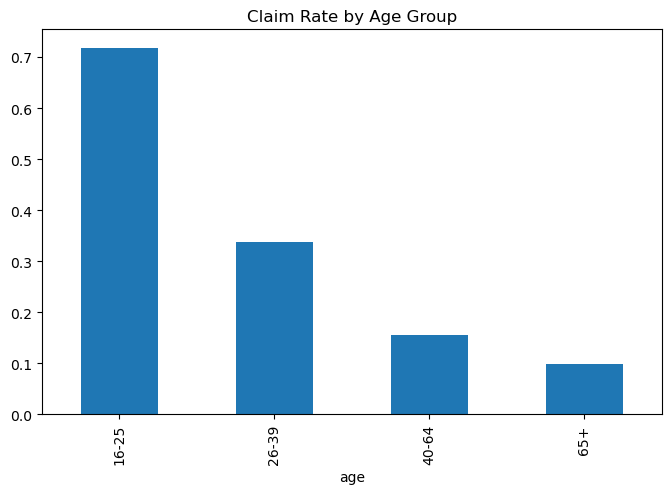

In [23]:
plt.figure(figsize=[8,5])
df.groupby('age')['claim_rate'].mean().plot(kind="bar")
plt.title("Claim Rate by Age Group")
plt.show()

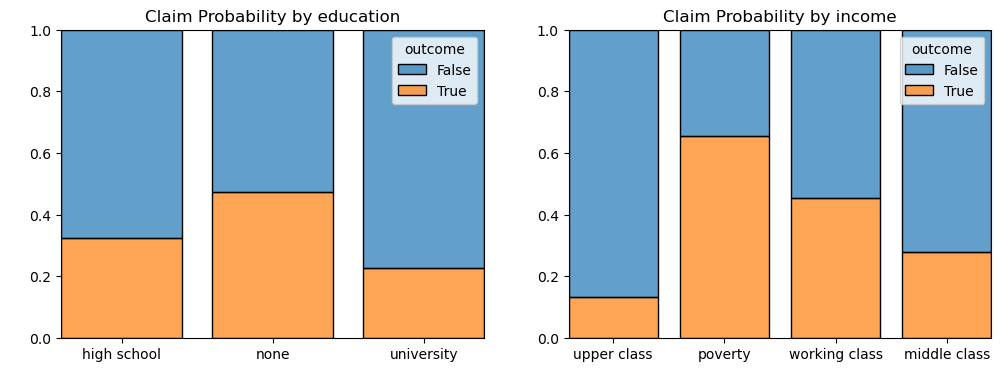

In [25]:
fig, axes = plt.subplots(1,2,figsize=(12,4))
for i,col in enumerate(["education","income"]):
    sns.histplot(df, ax=axes[i],x=col, hue="outcome",stat="probability", multiple="fill", shrink=.8,alpha=0.7)
    axes[i].set(title="Claim Probability by "+ col,ylabel=" ",xlabel=" ")